In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

In [6]:
def view_im(im, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    
    ax.imshow(im, cmap='gray')
    ax.axis('off')

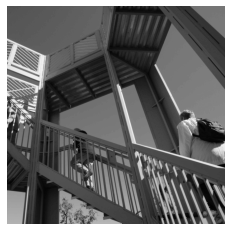

In [5]:
im = misc.ascent()
view_im(im)

In [26]:
fts = {
    'iden': np.array([
        [0, 0, 0],
        [0, 1, 0],
        [0, 0, 0]
    ]),
    'laplace': np.array([
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0]
    ]),
    'h-edge': np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ]),
    'v-edge': np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ]),
    'blur': (1/9)*np.ones([3, 3])
}

In [9]:
def ft_im(im, ft):
    new_im = np.zeros([
        im.shape[0] - ft.shape[0] + 1,
        im.shape[1] - ft.shape[1] + 1
    ])
    for i, frow in enumerate(ft):
        for j, fval in enumerate(frow):
            new_im += fval*im[i:i+new_im.shape[0], j:j+new_im.shape[1]]
    return new_im

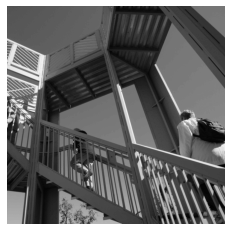

In [15]:
view_im(ft_im(im, fts['iden']))

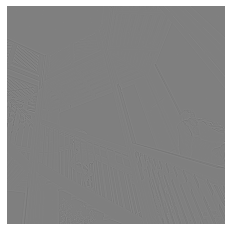

In [16]:
view_im(ft_im(im, fts['laplace']))

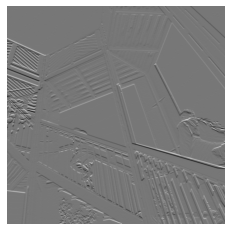

In [18]:
view_im(ft_im(im, fts['h-edge']))

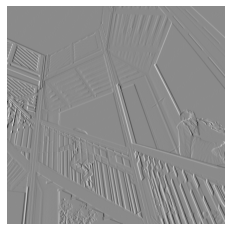

In [19]:
view_im(ft_im(im, fts['v-edge']))

In [21]:
def pixel_cutoff(im, lower=0, upper=255):
    im[im < lower] = lower
    im[im > upper] = upper
    return im

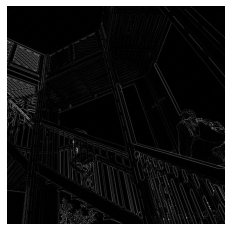

In [22]:
view_im(pixel_cutoff(ft_im(im, fts['laplace'])))

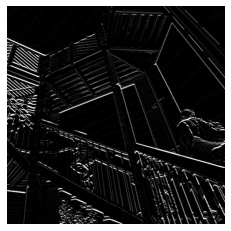

In [23]:
view_im(pixel_cutoff(ft_im(im, fts['h-edge'])))

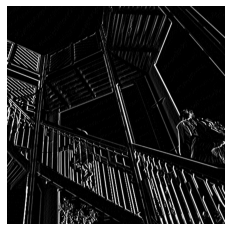

In [24]:
view_im(pixel_cutoff(ft_im(im, fts['v-edge'])))

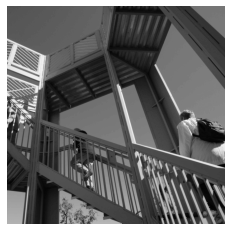

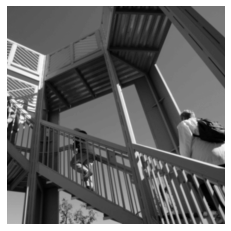

In [28]:
view_im(im)
view_im(ft_im(im, fts['blur']))

In [33]:
def view_im2(im, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    
    ax.imshow(im, cmap='gray')

def im_maxpool(im, pool_shape):
    ny = im.shape[0] // pool_shape[0]
    nx = im.shape[1] // pool_shape[1]
    new_im = np.full([ny, nx], -np.inf, dtype=np.float64)
    im = im[:ny*pool_shape[0], :nx*pool_shape[1]]
    
    for i in range(pool_shape[0]):
        for j in range(pool_shape[1]):
            new_im = np.maximum(new_im, im[i::pool_shape[0], j::pool_shape[1]])
    return new_im

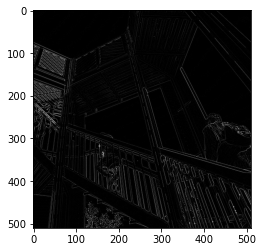

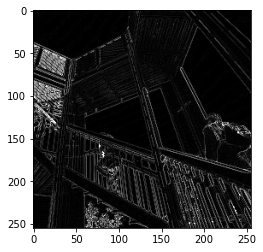

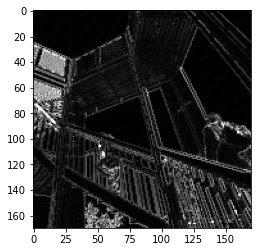

In [35]:
new_im = pixel_cutoff(ft_im(im, fts['laplace']))
view_im2(new_im)
view_im2(im_maxpool(new_im, (2, 2)))
view_im2(im_maxpool(new_im, (3, 3)))

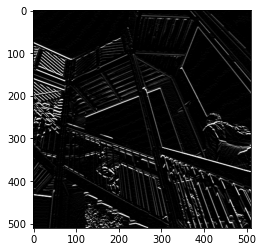

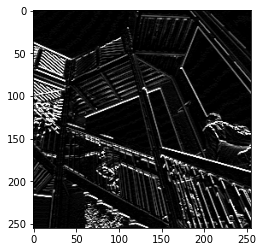

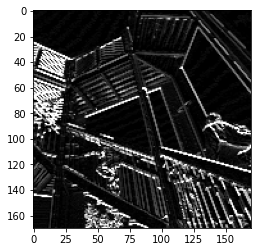

In [36]:
new_im = pixel_cutoff(ft_im(im, fts['h-edge']))
view_im2(new_im)
view_im2(im_maxpool(new_im, (2, 2)))
view_im2(im_maxpool(new_im, (3, 3)))